

---MNIST Digit class by Siddhartha



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # imgae recognization
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loadng MNIST Data from keras dataset

In [30]:
(X_train ,Y_train), (X_test ,Y_test) =mnist.load_data()

In [31]:
type(X_train)

numpy.ndarray

In [32]:
#Shape of the numpy array
print((X_train.shape ,Y_train.shape), (X_test.shape ,Y_test.shape) )

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Training data=60000

  Test data=10000

img dia=28*28
grayscale image= 1 channel

In [33]:
# printing 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [34]:
print(X_train[10].shape)

(28, 28)


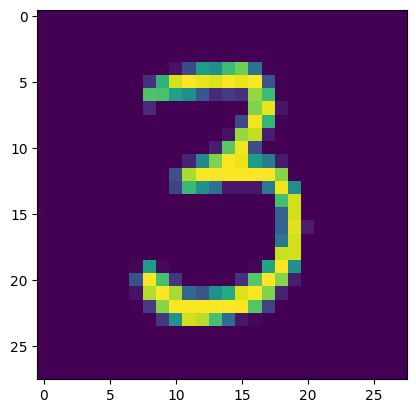

3


In [35]:
#display image
plt.imshow(X_train[50])
plt.show()

# print the correspondinglabel

print(Y_train[50])

In [36]:
Y_train[50]

3

Image labels

In [37]:
print(Y_train.shape , Y_test.shape)

(60000,) (10000,)


Unique values in Y_train

In [38]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [39]:
# unique value in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]


We can use this lables as such or we can also applying in One hot Encoding

all images ahve same dia in daatset..if not we have to resize all image in common dia

In [40]:
#Scalling values
X_train=X_train/255
X_test=X_test/255


In [41]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

uilding NN

In [42]:
#SEtting  up layer of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])


In [43]:
# compiling NN

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [44]:
# trainng NN

model.fit(X_train ,Y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2955 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1353 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0992 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0808 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0667 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.034

Trining data accuracy is 98.9%

Accuracy on Test data

In [45]:
loss , accuracy =model.evaluate(X_test ,Y_test)
print(accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9748
0.9747999906539917


Test data accuracy =97.1%

In [46]:
print(X_test.shape)

(10000, 28, 28)


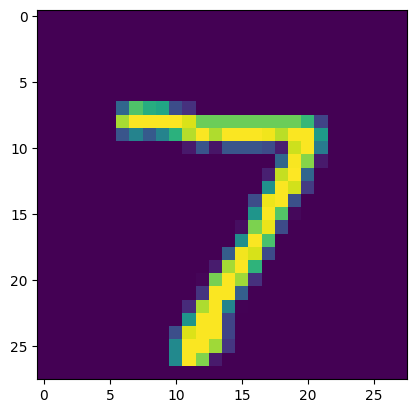

In [49]:
# display 1st data image in X_test

plt.imshow(X_test[0])
plt.show()

In [50]:
print(Y_test[0])

7


In [51]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [52]:
print(Y_pred.shape)

(10000, 10)


In [53]:
print(Y_pred[0])

[2.4413224e-04 2.3902706e-03 5.1857919e-01 9.9739522e-01 1.7199163e-07
 2.6885703e-01 9.3710917e-10 9.9999976e-01 1.8828761e-02 6.8785042e-02]


model.predict() gives prediction of probability of each classfor that perticular datapoint

In [55]:
#converting the prediction probability to class lables

label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [56]:
#converting prediction probability to class lable for all test data points

Y_pred_lables=[np.argmax(i) for i in Y_pred]
print(Y_pred_lables)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [57]:
print(Y_pred)  #before value prediction

[[2.4413224e-04 2.3902706e-03 5.1857919e-01 ... 9.9999976e-01
  1.8828761e-02 6.8785042e-02]
 [1.1470945e-05 9.9330294e-01 9.9999917e-01 ... 1.1145045e-03
  5.3524464e-02 1.3401286e-13]
 [1.8337370e-03 9.9980021e-01 2.9291886e-01 ... 4.9713084e-01
  3.4387916e-01 3.3335124e-05]
 ...
 [1.0320452e-06 1.0047710e-03 5.9059508e-05 ... 8.5423750e-01
  5.6036204e-01 9.8411179e-01]
 [6.7849462e-05 6.3360924e-01 5.9051678e-04 ... 2.3925431e-02
  6.8569499e-01 9.9168437e-06]
 [6.2614757e-01 1.0342793e-07 2.0908612e-06 ... 2.4594572e-06
  8.9366967e-03 1.9219011e-04]]


Y_test ---> true lales
Y_pred_labels --->predicted labels

Building confusion matrix

In [58]:
conf_mat= confusion_matrix(Y_test , Y_pred_lables)

In [59]:
print(conf_mat)

tf.Tensor(
[[ 969    0    2    1    0    1    5    0    2    0]
 [   0 1123    4    1    0    2    2    0    3    0]
 [   5    3 1003    6    3    1    1    5    5    0]
 [   0    0    6  975    0   18    0    2    2    7]
 [   1    2    4    0  958    0    4    3    0   10]
 [   3    0    0    5    2  874    5    0    1    2]
 [   3    3    1    2    7    6  933    0    3    0]
 [   2    5   11    3    1    1    0 1001    1    3]
 [   2    2    2    5    3   10    2    3  939    6]
 [   4    5    0    2    8    8    0    6    4  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

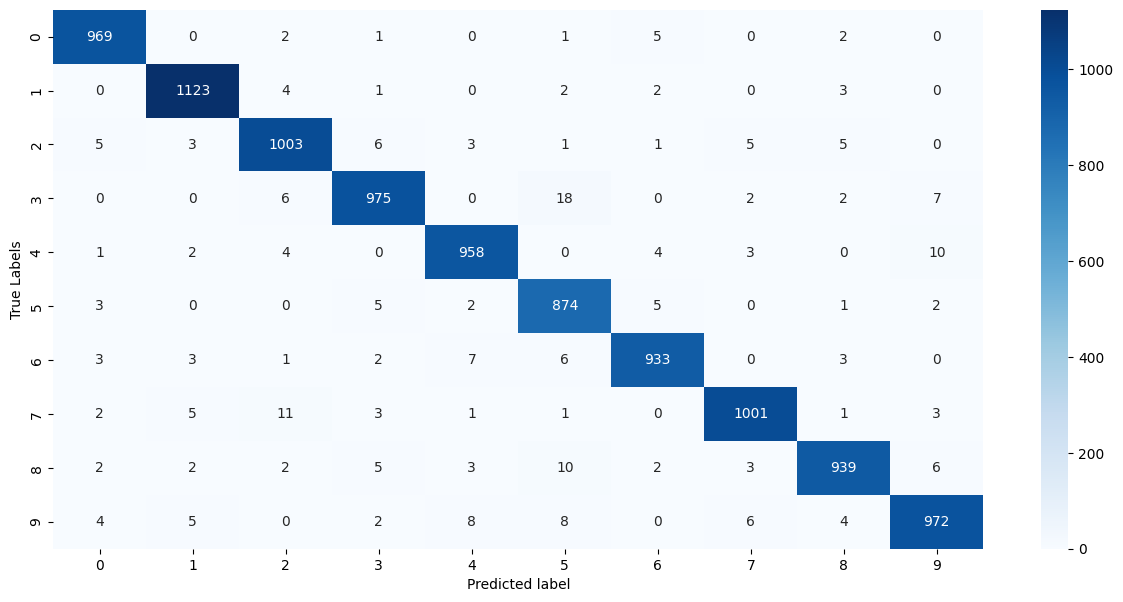

In [62]:
plt.figure(figsize=(15 ,7))
sns.heatmap(conf_mat ,annot=True ,fmt='d' ,cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted label')